In [50]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import json

In [51]:
dir_dHCP = '/home/jl274628/Documents/info_dHCP.tsv'
dir_Utrecht = '/home/jl274628/Documents/Preterm/infosPreterms.xlsx'
dir_labels = '/home/jl274628/Documents/Rskeleton_subject.csv'

In [52]:
age_dHCP = pd.read_csv(dir_dHCP, usecols=['participant_id','scan_age'], sep='\t')
age_Utrecht = pd.read_excel(dir_Utrecht, usecols=['BrainVisaNo', 'PMA40', 'GA'], dtype='str')
labels = pd.read_csv(dir_labels, sep=',')

In [56]:
list_labels = labels['Subject'].tolist()
list_labels.remove('kt090312')
list_ages = []

for idx, elem in enumerate(list_labels):
    if idx < 71:
        age = float(age_Utrecht.loc[age_Utrecht['BrainVisaNo'] == elem[3:]]['PMA40'].tolist()[0])
    else:
        age = float(age_dHCP.loc[age_dHCP['participant_id'] == elem[4:15]]['scan_age'].tolist()[0])
    list_ages.append(age)

NB: only one subject in dHCP Release 1 has 2 scans, 36 and 39 weeks, not a big deal

In [38]:
df = pd.DataFrame({'Subject': list_labels,
                   'scan_age': list_ages})

df.to_csv('/home/jl274628/Documents/scan_age_old_preterm_dataset.csv', sep=',', index=False)

In [39]:
# include new dHCP subject and get birth / scan age
dir_dHCP = '/home/jl274628/Documents/info_dHCP.tsv'
age_dHCP = pd.read_csv(dir_dHCP, usecols=['participant_id','birth_age','scan_age','session_id'], sep='\t')

# first dHCP subjects
dir_labels_1 = '/home/jl274628/Documents/Rskeleton_subject.csv'
list_labels_1 = labels['Subject'].tolist()[-40:]
list_labels_1 = [elem[4:15] for elem in list_labels_1]
# new dHCP subjects
dir_labels_2 = '/neurospin/grip/external_databases/dHCP_CR_JD_2018/Projects/denis/release3_morpho/dHCP/'
list_labels_2 = [f for f in os.listdir(dir_labels_2) if f[-1]!='f']

In [40]:
# check that there is no overlap
# concatenate lists with unique subjects
list_labels = list_labels_2.copy()
for subject in list_labels_1:
    if subject in list_labels_2:
        print(f'subject : {subject} in both dataset')
    else:
        list_labels.append(subject)

subject : CC00122XX07 in both dataset
subject : CC00205XX07 in both dataset
subject : CC00418BN14 in both dataset


In [41]:
age_list = []
for subject in list_labels:
    age = age_dHCP.loc[age_dHCP['participant_id']==subject].iloc[0]['birth_age']
    age_list.append(age)

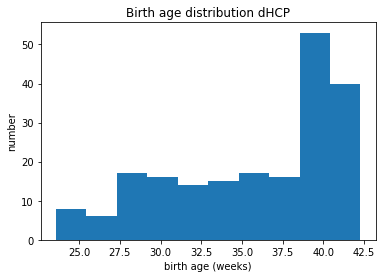

In [45]:
# plot birth age and scan age histograms
fig, ax = plt.subplots()
ax.hist(age_list)
ax.set_xlabel('birth age (weeks)')
ax.set_ylabel('number')
ax.set_title('Birth age distribution dHCP')
plt.show()

In [42]:
preterm = [age < 30 for age in age_list]

In [43]:
# sometimes multiple scan age: which one do we have ?
age_dHCP.loc[age_dHCP['participant_id']=='CC01025XX11']

,participant_id,session_id,birth_age,scan_age
802,CC01025XX11,50230,23.714286,36.29
803,CC01025XX11,61330,23.714286,42.86


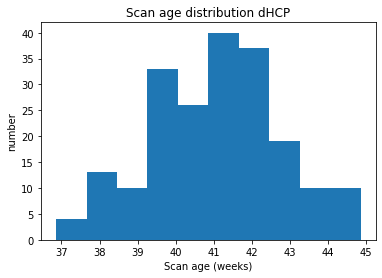

In [30]:
# Get scan age

dir_sessions = "/neurospin/grip/external_databases/dHCP_CR_JD_2018/Projects/denis/release3_scripts/subjects_file.json"
with open(dir_sessions) as json_file:
    sessions = json.load(json_file)

scan_age_list = []
for subject in list_labels:
    subject_scans = age_dHCP.loc[age_dHCP['participant_id']==subject]
    # sometimes two scan ages for preterm
    if subject_scans.shape[0] > 1:
        # get the session id selected in the dataset and extract the right scan_age
        session=sessions[subject]['session_id']
        ages = subject_scans.loc[subject_scans['session_id']==session]
        if ages.shape[0]==1:
            age = ages['scan_age'].tolist()[0]
        else:
            print(f'ERROR: session not found for subject {subject}')
            break
            

    else:
        age = subject_scans['scan_age'].tolist()[0]
    scan_age_list.append(age)

fig, ax = plt.subplots()
ax.hist(scan_age_list)
ax.set_xlabel('Scan age (weeks)')
ax.set_ylabel('number')
ax.set_title('Scan age distribution dHCP')
plt.show()

In [49]:
df_age = pd.DataFrame({'Subject': list_labels,
                       'birth_age': age_list,
                       'Preterm': preterm,
                       'scan_age': scan_age_list})

df_age.to_csv('/neurospin/dico/jlaval/data/labels_dHCP.csv', index=False, sep=',')

In [31]:
# same for Utrecht to compare
birth_age = np.array(age_Utrecht['GA'].tolist()).astype(float)
scan_age = np.array(age_Utrecht['PMA40'].tolist()).astype(float)

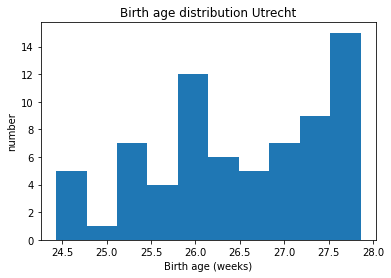

In [32]:
# plot birth age and scan age histograms
fig, ax = plt.subplots()
ax.hist(birth_age)
ax.set_xlabel('Birth age (weeks)')
ax.set_ylabel('number')
ax.set_title('Birth age distribution Utrecht')
plt.show()

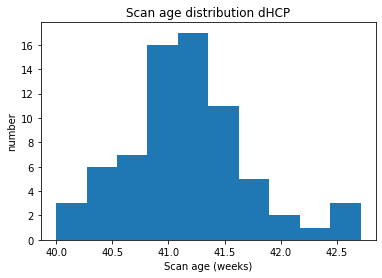

In [76]:
fig, ax = plt.subplots()
ax.hist(scan_age)
ax.set_xlabel('Scan age (weeks)')
ax.set_ylabel('number')
ax.set_title('Scan age distribution dHCP')
plt.show()

In [15]:
# check which subjects in dHCP have multiple scans
multi_scan_subjects = []
for subject in list_labels:
    age = age_dHCP.loc[age_dHCP['participant_id']==subject]['scan_age'].tolist()
    if len(age) > 1:
        multi_scan_subjects.append(subject)
print(len(multi_scan_subjects))
print(multi_scan_subjects)


91
['CC00576XX16', 'CC00718XX17', 'CC00600XX06', 'CC00657XX14', 'CC00245BN15', 'CC01011XX05', 'CC00889AN24', 'CC00830XX14', 'CC00823XX15', 'CC00792XX18', 'CC00489XX20', 'CC00855XX14', 'CC00407BN11', 'CC00797XX23', 'CC00284AN13', 'CC00361XX07', 'CC00271XX08', 'CC00802XX10', 'CC01025XX11', 'CC00632XX14', 'CC00418AN14', 'CC00518XX15', 'CC00629XX19', 'CC00723XX14', 'CC00569XX17', 'CC01005XX07', 'CC00712XX11', 'CC00672AN13', 'CC00867XX18', 'CC00621XX11', 'CC00829XX21', 'CC00689XX22', 'CC00517XX14', 'CC00997BN25', 'CC00672BN13', 'CC00135BN12', 'CC00686XX19', 'CC00526XX15', 'CC00191XX11', 'CC00136AN13', 'CC00747XX22', 'CC00805XX13', 'CC00098AN17', 'CC00838XX22', 'CC01077XX14', 'CC00525XX14', 'CC00406XX10', 'CC00305XX08', 'CC00954XX14', 'CC00986BN22', 'CC00227XX13', 'CC00666XX15', 'CC00907XX16', 'CC00407AN11', 'CC00284BN13', 'CC00529AN18', 'CC00326XX13', 'CC00986AN22', 'CC00245AN15', 'CC00395XX17', 'CC00845BN21', 'CC00946XX23', 'CC00648XX22', 'CC00770XX12', 'CC00804XX12', 'CC00617XX15', 'CC008